In [1]:

%run ../../load_magic/storage.py
%run ../../load_magic/dataframes.py
%pprint
gdp_df = load_object('gdp_df')
%who

DATA_FOLDER: ../data/
SAVES_FOLDER: ../saves/
Pretty printing has been turned OFF
DATA_CSV_FOLDER	 DATA_FOLDER	 ENCODING_TYPE	 SAVES_CSV_FOLDER	 SAVES_FOLDER	 SAVES_PICKLE_FOLDER	 attempt_to_pickle	 csv	 example_iterrows	 
gdp_df	 get_column_descriptions	 load_csv	 load_dataframes	 load_object	 math	 os	 pd	 pickle	 
save_dataframes	 store_objects	 sys	 


In [2]:

tables_url = 'https://www.thoughtco.com/gun-owners-percentage-of-state-populations-3325153'
tables_df_list = pd.read_html(tables_url)
print([(i, df.shape) for (i, df) in enumerate(tables_df_list) if df.shape[0] > 50])

[(0, (52, 4))]


In [10]:

state_guns_df = tables_df_list[0].dropna(axis=0, how='all').dropna(axis=1, how='all')
state_guns_df.columns = state_guns_df.iloc[0]
state_guns_df = state_guns_df.iloc[1:]
state_guns_df.set_index('State', inplace=True)
for column_name in ['Rank', '# of guns registered']:
    state_guns_df[column_name] = state_guns_df[column_name].map(lambda x: int(x))
state_guns_df['# of guns per capita'] = state_guns_df['# of guns per capita'].map(lambda x: float(x))
state_guns_df

,Rank,# of guns per capita,# of guns registered
State,,,
Wyoming,1,229.240,132806
Washington D.C.,2,68.050,47228
New Hampshire,3,46.760,64135
New Mexico,4,46.730,97580
Virginia,5,36.340,307822
Alabama,6,33.150,161641
Idaho,7,28.860,49566
Arkansas,8,26.570,79841
Nevada,9,25.640,76888


In [5]:

import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import seaborn as sns

explanatory_variable = 'Number of Guns Registered'
ev_column_name = '# of guns registered'
response_variable = 'Number of Guns per Capita'
rv_column_name = '# of guns per capita'

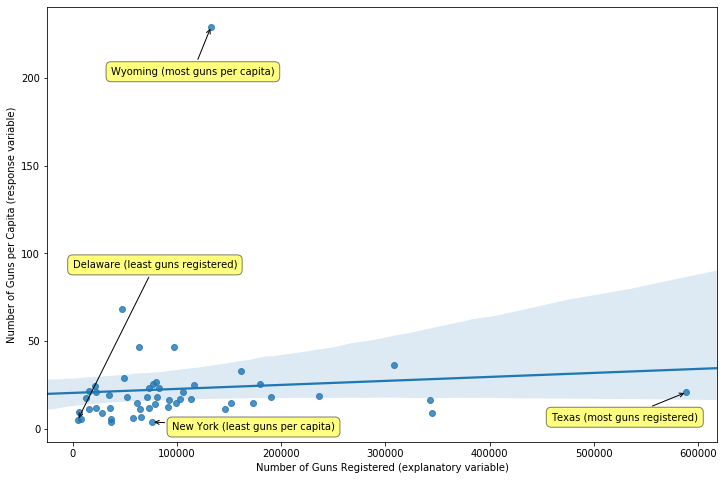

In [15]:

df = state_guns_df.copy()
ev_min_str = 'least guns registered'
ev_max_str = 'most guns registered'
rv_min_str = 'least guns per capita'
rv_max_str = 'most guns per capita'
ev_min_xytext = (-5, 150)
ev_max_xytext = (-135, -30)
rv_min_xytext = (20, -10)
rv_max_xytext = (-100, -50)
us_xytext = (-90, 40)

fig1_fig = plt.figure(figsize=(12,8))
columns_list = [ev_column_name, rv_column_name]
df = df[columns_list].dropna()

# First order (linear) scatterplot
merge_axes_subplot = sns.regplot(x=ev_column_name, y=rv_column_name,
                                 scatter=True, data=df)
xlabel_text = plt.xlabel('{} (explanatory variable)'.format(explanatory_variable))
ylabel_text = plt.ylabel('{} (response variable)'.format(response_variable))
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
ev_max = df[ev_column_name].max()
ev_min = df[ev_column_name].min()
rv_min = df[rv_column_name].min()
rv_max = df[rv_column_name].max()
for label, x, y in zip(df.index, df[ev_column_name], df[rv_column_name]):
    if (x == ev_min):
        annotation = plt.annotate('{} ({})'.format(label, ev_min_str), xy=(x, y), xytext=ev_min_xytext, **kwargs)
    elif (x == ev_max):
        annotation = plt.annotate('{} ({})'.format(label, ev_max_str), xy=(x, y), xytext=ev_max_xytext, **kwargs)
    elif (y == rv_min):
        annotation = plt.annotate('{} ({})'.format(label, rv_min_str), xy=(x, y), xytext=rv_min_xytext, **kwargs)
    elif (y == rv_max):
        annotation = plt.annotate('{} ({})'.format(label, rv_max_str), xy=(x, y), xytext=rv_max_xytext, **kwargs)

In [18]:

tables_url = 'https://en.wikipedia.org/wiki/List_of_U.S._states_by_homicide_rate'
tables_df_list = pd.read_html(tables_url)
print([(i, df.shape) for (i, df) in enumerate(tables_df_list) if df.shape[0] >= 50])

[(0, (50, 8))]


In [20]:

homicide_df = tables_df_list[0]
homicide_df.set_index('State', inplace=True)
for column_name in homicide_df.columns:
    homicide_df[column_name] = homicide_df[column_name].map(lambda x: float(x))
homicide_df

,2018,2017,2014,2010,2005,2000,1996
State,,,,,,,
Alabama,7.8,8.6,5.7,5.7,8.2,7.4,10.4
Alaska,6.4,8.4,5.6,4.3,4.8,4.3,7.4
Arizona,5.1,6.0,4.7,6.4,7.5,7.0,8.5
Arkansas,7.2,8.3,5.6,4.6,6.7,6.3,8.7
California,4.4,4.6,4.4,4.8,6.9,6.1,9.1
Colorado,3.7,4.0,2.8,2.6,3.7,3.1,4.7
Connecticut,2.3,2.9,2.4,3.7,2.9,2.9,4.8
Delaware,5.0,5.3,5.8,5.7,4.4,3.2,4.3
Florida,5.2,5.0,5.8,5.2,5.0,5.6,7.5


In [21]:

explanatory_variable = 'Number of Guns per Capita'
ev_column_name = '# of guns per capita'
response_variable = '2018 Homicide Rate'
rv_column_name = '2018'
merge_df = pd.merge(left=state_guns_df, right=homicide_df, left_index=True,
                    right_index=True, suffixes=('_guns', '_homicide'))

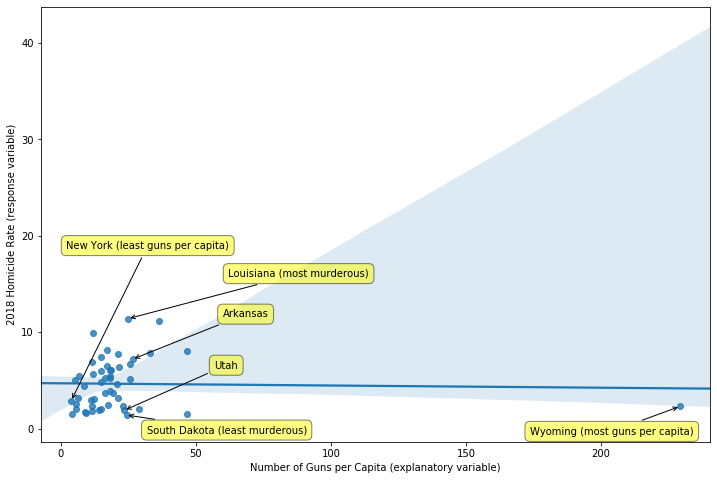

In [27]:

df = merge_df.copy()
ev_min_str = 'least guns per capita'
ev_max_str = 'most guns per capita'
rv_min_str = 'least murderous'
rv_max_str = 'most murderous'
ev_min_xytext = (-5, 150)
ev_max_xytext = (-150, -30)
rv_min_xytext = (20, -20)
rv_max_xytext = (100, 40)
us_xytext = (-90, 40)

fig1_fig = plt.figure(figsize=(12,8))
columns_list = [ev_column_name, rv_column_name]
df = df[columns_list].dropna()

# First order (linear) scatterplot
merge_axes_subplot = sns.regplot(x=ev_column_name, y=rv_column_name,
                                 scatter=True, data=df)
xlabel_text = plt.xlabel('{} (explanatory variable)'.format(explanatory_variable))
ylabel_text = plt.ylabel('{} (response variable)'.format(response_variable))
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
ev_max = df[ev_column_name].max()
ev_min = df[ev_column_name].min()
rv_min = df[rv_column_name].min()
rv_max = df[rv_column_name].max()
for label, x, y in zip(df.index, df[ev_column_name], df[rv_column_name]):
    if (x == ev_min):
        annotation = plt.annotate('{} ({})'.format(label, ev_min_str), xy=(x, y), xytext=ev_min_xytext, **kwargs)
    elif (x == ev_max):
        annotation = plt.annotate('{} ({})'.format(label, ev_max_str), xy=(x, y), xytext=ev_max_xytext, **kwargs)
    elif (y == rv_min):
        annotation = plt.annotate('{} ({})'.format(label, rv_min_str), xy=(x, y), xytext=rv_min_xytext, **kwargs)
    elif (y == rv_max):
        annotation = plt.annotate('{} ({})'.format(label, rv_max_str), xy=(x, y), xytext=rv_max_xytext, **kwargs)
    elif (label == 'Utah'):
        annotation = plt.annotate('{}'.format(label), xy=(x, y), xytext=(90, 40), **kwargs)
    elif (label == 'Arkansas'):
        annotation = plt.annotate('{}'.format(label), xy=(x, y), xytext=(90, 40), **kwargs)

In [28]:

%who

DATA_CSV_FOLDER	 DATA_FOLDER	 ENCODING_TYPE	 SAVES_CSV_FOLDER	 SAVES_FOLDER	 SAVES_PICKLE_FOLDER	 annotation	 attempt_to_pickle	 column_name	 
columns_list	 csv	 df	 ev_column_name	 ev_max	 ev_max_str	 ev_max_xytext	 ev_min	 ev_min_str	 
ev_min_xytext	 example_iterrows	 explanatory_variable	 fig1_fig	 gdp_df	 get_column_descriptions	 homicide_df	 kwargs	 label	 
load_csv	 load_dataframes	 load_object	 math	 merge_axes_subplot	 merge_df	 os	 pd	 pickle	 
plt	 response_variable	 rv_column_name	 rv_max	 rv_max_str	 rv_max_xytext	 rv_min	 rv_min_str	 rv_min_xytext	 
save_dataframes	 sns	 state_guns_df	 store_objects	 sys	 tables_df_list	 tables_url	 us_xytext	 x	 
xlabel_text	 y	 ylabel_text	 


In [31]:

column_description_dict = load_object('column_description_dict')

In [34]:

for column_name in gdp_df.columns:
    if column_name in column_description_dict:
        print('{} ({})'.format(column_name, column_description_dict[column_name]))
    else:
        print(column_name)

Ethnic_diversity_rank
Ethnic_fractionalization_index
Cultural_diversity_index
Fractionalization_rank
Ethnic_fractionalization
Linguistic_fractionalization
Religious_fractionalization
Murder_rate
Murder_count
Region
Subregion
Year_listed
UNODC_notes
Gun_rank
Guns_per_100_residents
Karp_notes
Region_code
Subregion_code
IQ_Rank
IQ
CC_EST (Control of Corruption: Estimate)
CC_NO_SRC (Control of Corruption: Number of Sources)
CC_PER_RNK (Control of Corruption: Percentile Rank)
CC_PER_RNK_LOWER (Control of Corruption: Percentile Rank, Lower Bound of 90% Confidence Interval)
CC_PER_RNK_UPPER (Control of Corruption: Percentile Rank, Upper Bound of 90% Confidence Interval)
CC_STD_ERR (Control of Corruption: Standard Error)
GE_EST (Government Effectiveness: Estimate)
GE_NO_SRC (Government Effectiveness: Number of Sources)
GE_PER_RNK (Government Effectiveness: Percentile Rank)
GE_PER_RNK_LOWER (Government Effectiveness: Percentile Rank, Lower Bound of 90% Confidence Interval)
GE_PER_RNK_UPPER (Gov

In [35]:

import random

dir(random)

['BPF', 'LOG4', 'NV_MAGICCONST', 'RECIP_BPF', 'Random', 'SG_MAGICCONST', 'SystemRandom', 'TWOPI', '_BuiltinMethodType', '_MethodType', '_Sequence', '_Set', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_acos', '_bisect', '_ceil', '_cos', '_e', '_exp', '_inst', '_itertools', '_log', '_pi', '_random', '_sha512', '_sin', '_sqrt', '_test', '_test_generator', '_urandom', '_warn', 'betavariate', 'choice', 'choices', 'expovariate', 'gammavariate', 'gauss', 'getrandbits', 'getstate', 'lognormvariate', 'normalvariate', 'paretovariate', 'randint', 'random', 'randrange', 'sample', 'seed', 'setstate', 'shuffle', 'triangular', 'uniform', 'vonmisesvariate', 'weibullvariate']

In [40]:

for column_name in random.sample(population=gdp_df.columns.tolist(), k=2):
    if column_name in column_description_dict:
        print('{} ({})'.format(column_name, column_description_dict[column_name]))
    else:
        column_list = column_name.split('_')
        descr_list = []
        for word in column_list:
            descr_list.append(word[0].upper()+word[1:])
        print('{} ({})'.format(column_name, ' '.join(descr_list)))

PV_STD_ERR (Political Stability and Absence of Violence/Terrorism: Standard Error)
Region_code (Region Code)


In [48]:

import matplotlib.colors as mcolors

basecolor_list = list(mcolors.BASE_COLORS.keys())
def get_column_description(column_name):
    if column_name in column_description_dict:
        column_description = column_description_dict[column_name]
    else:
        column_list = column_name.split('_')
        descr_list = []
        for word in column_list:
            descr_list.append(word[0].upper()+word[1:])
        column_description = ' '.join(descr_list)
    
    return column_description

In [49]:

ev_min_xytext = (-5, 150)
ev_max_xytext = (-150, -30)
rv_min_xytext = (20, -20)
rv_max_xytext = (100, 40)
us_xytext = (-90, 40)
fc_colunm_name = 'Region_code'
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

In [64]:

columns_list = random.sample(population=gdp_df.columns.tolist(), k=2)
ev_column_name = columns_list[0]
rv_column_name = columns_list[1]
explanatory_variable = get_column_description(ev_column_name)
response_variable = get_column_description(rv_column_name)
ev_min_str = 'minimum {}'.format(explanatory_variable)
ev_max_str = 'maximum {}'.format(explanatory_variable)
rv_min_str = 'minimum {}'.format(response_variable)
rv_max_str = 'maximum {}'.format(response_variable)

In [65]:

df = gdp_df.copy()
columns_list = [ev_column_name, rv_column_name, fc_colunm_name]
df = df[columns_list].dropna()
scatter_kws = dict(facecolors=[basecolor_list[rc] for rc in df[fc_colunm_name].tolist()])
ev_max = df[ev_column_name].max()
ev_min = df[ev_column_name].min()
rv_min = df[rv_column_name].min()
rv_max = df[rv_column_name].max()
ev_max_labeled = False
ev_min_labeled = False
rv_min_labeled = False
rv_max_labeled = False

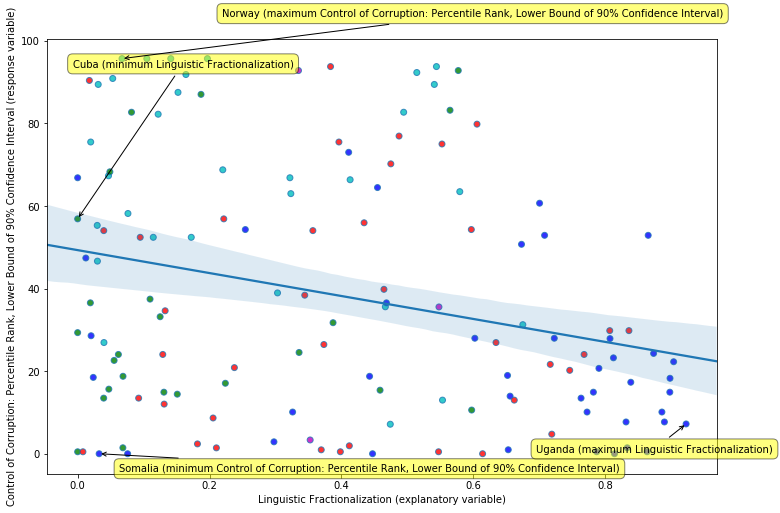

In [66]:

# First order (linear) scatterplot
fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x=ev_column_name, y=rv_column_name,
                                 scatter=True, data=df, scatter_kws=scatter_kws)
xlabel_text = plt.xlabel('{} (explanatory variable)'.format(explanatory_variable))
ylabel_text = plt.ylabel('{} (response variable)'.format(response_variable))
for label, x, y in zip(df.index, df[ev_column_name], df[rv_column_name]):
    if (x == ev_min):
        if not ev_min_labeled:
            ev_min_labeled = True
            annotation = plt.annotate('{} ({})'.format(label, ev_min_str), xy=(x, y), xytext=ev_min_xytext, **kwargs)
    elif (x == ev_max):
        if not ev_max_labeled:
            ev_max_labeled = True
            annotation = plt.annotate('{} ({})'.format(label, ev_max_str), xy=(x, y), xytext=ev_max_xytext, **kwargs)
    elif (y == rv_min):
        if not rv_min_labeled:
            rv_min_labeled = True
            annotation = plt.annotate('{} ({})'.format(label, rv_min_str), xy=(x, y), xytext=rv_min_xytext, **kwargs)
    elif (y == rv_max):
        if not rv_max_labeled:
            rv_max_labeled = True
            annotation = plt.annotate('{} ({})'.format(label, rv_max_str), xy=(x, y), xytext=rv_max_xytext, **kwargs)

In [67]:

[fn for fn in dir(gdp_df) if 'cor' in fn.lower()]

['corr', 'corrwith', 'from_records', 'to_records']

In [229]:

columns_list = random.sample(population=gdp_df.columns.tolist(), k=2)
def show_linear_scatterplot(columns_list, ev_min_str=None, ev_max_str=None, rv_min_str=None, rv_max_str=None):
    ev_column_name = columns_list[0]
    rv_column_name = columns_list[1]
    explanatory_variable = get_column_description(ev_column_name)
    response_variable = get_column_description(rv_column_name)
    if (ev_min_str is None):
        ev_min_str = 'minimum {}'.format(explanatory_variable)
    if (ev_max_str is None):
        ev_max_str = 'maximum {}'.format(explanatory_variable)
    if (rv_min_str is None):
        rv_min_str = 'minimum {}'.format(response_variable)
    if (rv_max_str is None):
        rv_max_str = 'maximum {}'.format(response_variable)
    
    df = gdp_df.copy()
    columns_list = [ev_column_name, rv_column_name, fc_colunm_name]
    df = df[columns_list].dropna()
    scatter_kws = dict(facecolors=[basecolor_list[rc] for rc in df[fc_colunm_name].tolist()])
    ev_max = df[ev_column_name].max()
    ev_min = df[ev_column_name].min()
    rv_min = df[rv_column_name].min()
    rv_max = df[rv_column_name].max()
    ev_max_labeled = False
    ev_min_labeled = False
    rv_min_labeled = False
    rv_max_labeled = False
    
    # First order (linear) scatterplot
    fig1_fig = plt.figure(figsize=(12,8))
    merge_axes_subplot = sns.regplot(x=ev_column_name, y=rv_column_name,
                                     scatter=True, data=df, scatter_kws=scatter_kws)
    xlabel_text = plt.xlabel('{} (explanatory variable)'.format(explanatory_variable))
    ylabel_text = plt.ylabel('{} (response variable)'.format(response_variable))
    
    # Add annotations
    for label, x, y in zip(df.index, df[ev_column_name], df[rv_column_name]):
        if (x == ev_min):
            if not ev_min_labeled:
                ev_min_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, ev_min_str), xy=(x, y), xytext=ev_min_xytext, **kwargs)
        elif (x == ev_max):
            if not ev_max_labeled:
                ev_max_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, ev_max_str), xy=(x, y), xytext=ev_max_xytext, **kwargs)
        elif (y == rv_min):
            if not rv_min_labeled:
                rv_min_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, rv_min_str), xy=(x, y), xytext=rv_min_xytext, **kwargs)
        elif (y == rv_max):
            if not rv_max_labeled:
                rv_max_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, rv_max_str), xy=(x, y), xytext=rv_max_xytext, **kwargs)
        elif (label == 'United States'):
            annotation = plt.annotate('{} (most evil)'.format(label), xy=(x, y), xytext=us_xytext, **kwargs)
    
    # Add r-squared
    x = df[ev_column_name].values
    y = df[rv_column_name].values
    plt.text(0.93, 0.965, r'$r^2 = {0:.2}$'.format(stats.pearsonr(x, y)[0] ** 2), fontsize=20, alpha=0.25,
             horizontalalignment='center', verticalalignment='center', transform=merge_axes_subplot.transAxes)

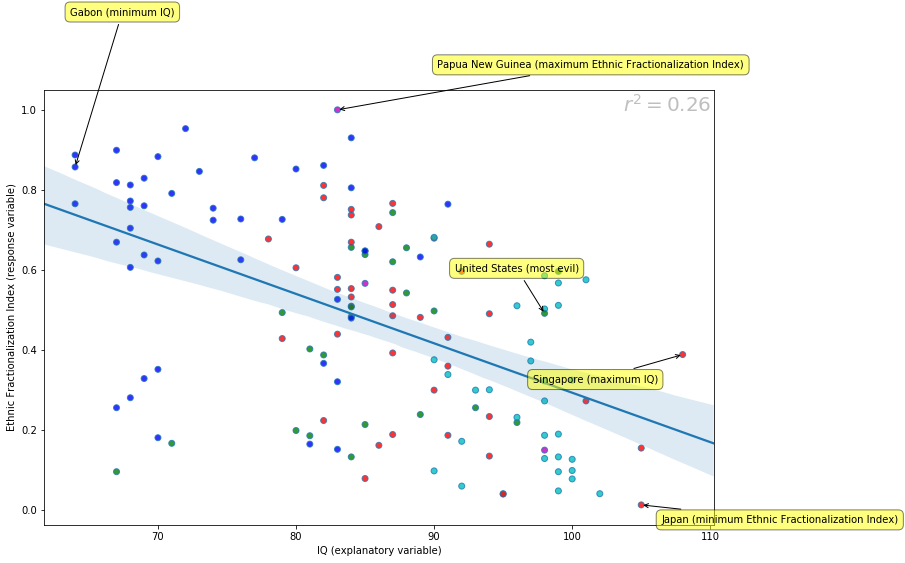

In [230]:

ev_min_xytext = (-5, 150)
ev_max_xytext = (-150, -30)
rv_min_xytext = (20, -20)
rv_max_xytext = (100, 40)
us_xytext = (-90, 40)
columns_list = ['IQ', 'Ethnic_fractionalization_index']
show_linear_scatterplot(columns_list)

In [84]:

import math

corr_tuple_list = []
for row_index, row_series in gdp_corr_df.iterrows():
    #print(row_index)
    for column_index, column_value in row_series.iteritems():
        if row_index != column_index:
            #print(column_index, column_value)
            corr_tuple = (row_index, column_index, abs(column_value))
            corr_tuple_list.append(corr_tuple)

('IQ_Rank', 'IQ', 0.9995182791912105)


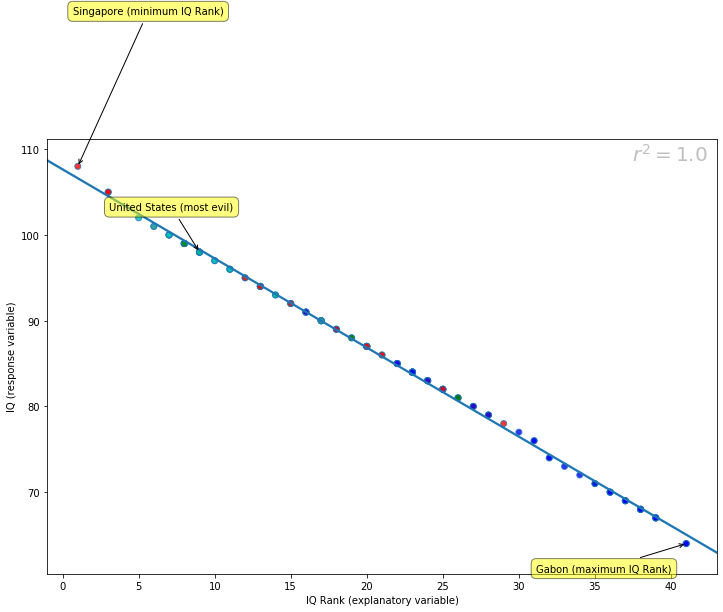

In [231]:

corr_list = [tuple for tuple in sorted(corr_tuple_list, key=lambda x: x[2], reverse=True) if tuple[2] > 0.95]
for tuple in corr_list[::2]:
    print(tuple)
    show_linear_scatterplot(tuple[:2])
    break

('VA_PER_RNK', 'VA_PER_RNK_LOWER', 0.9977584093251531)


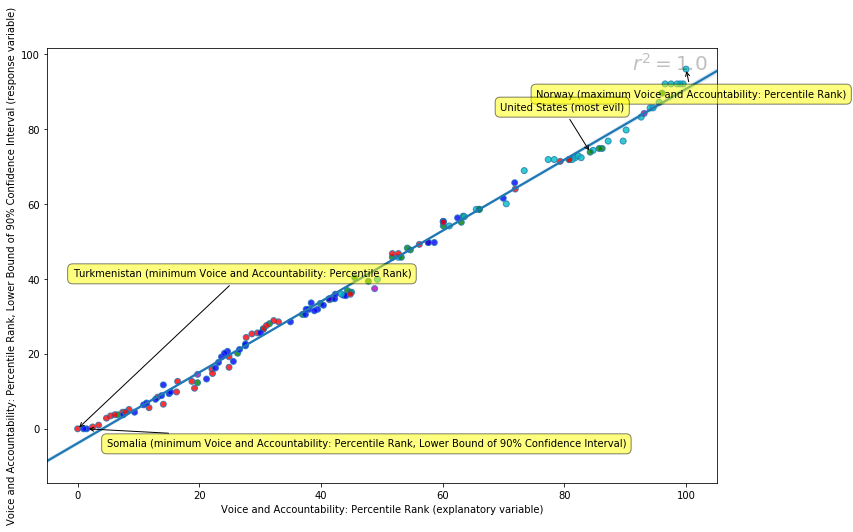

In [232]:

tuple = random.sample(corr_list[::2], k=1)[0]
print(tuple)
show_linear_scatterplot(tuple[:2])

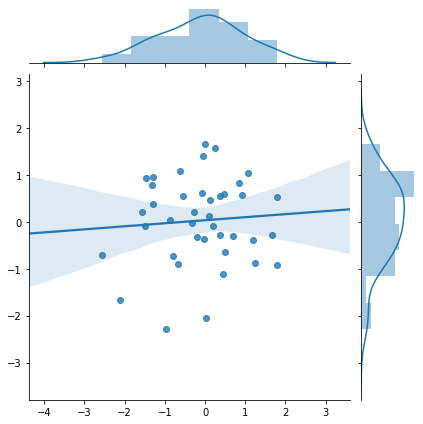

In [128]:

import seaborn as sns
import numpy as np

x, y = np.random.randn(2, 40)
JointGrid_obj = sns.jointplot(x, y, kind="reg")

C:\Users\dev\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


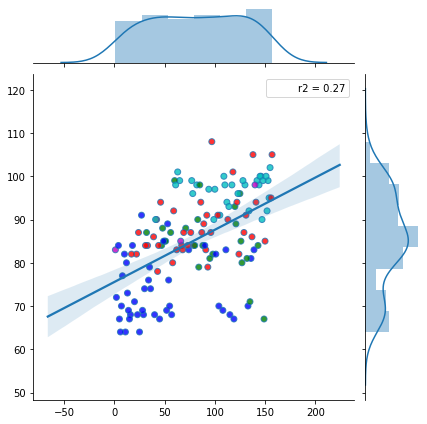

In [176]:

from scipy import stats

def r2(x, y):
    
    return stats.pearsonr(x, y)[0] ** 2

columns_list = ['Ethnic_diversity_rank', 'IQ', fc_colunm_name]
df = gdp_df[columns_list].dropna()
x = df['Ethnic_diversity_rank'].values
y = df['IQ'].values
scatter_kws = dict(facecolors=[basecolor_list[rc] for rc in df[fc_colunm_name].tolist()])
JointGrid_obj = sns.jointplot(x, y, kind="reg", stat_func=r2, scatter_kws=scatter_kws)

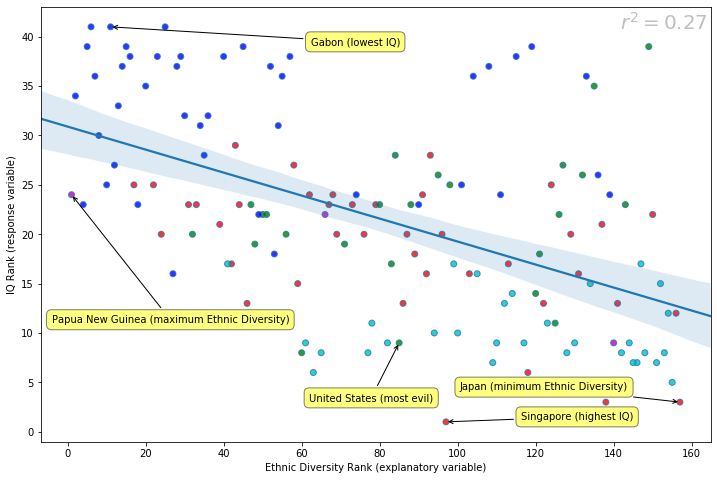

In [233]:

ev_min_xytext = (-20, -130)
ev_max_xytext = (-220, 10)
rv_min_xytext = (75, 0)
rv_max_xytext = (200, -20)
us_xytext = (-90, -60)
columns_list = ['Ethnic_diversity_rank', 'IQ_Rank']
show_linear_scatterplot(columns_list, ev_min_str='maximum Ethnic Diversity', ev_max_str='minimum Ethnic Diversity',
                        rv_min_str='highest IQ', rv_max_str='lowest IQ')

In [157]:

gdp_df['GDP_per_capita'] = pd.to_numeric(gdp_df['GDP_per_capita'])
column_descriptions_df = get_column_descriptions(gdp_df)
dtype_list = ['int64', 'float64']
mask_series = (column_descriptions_df['dtype'].isin(dtype_list))
numeric_columns_list = column_descriptions_df[mask_series]['column_name'].tolist()

In [158]:

for column_name in numeric_columns_list:
    gdp_df[column_name] = pd.to_numeric(gdp_df[column_name])

In [165]:

r_columns_list = []
for x_column in numeric_columns_list:
    for y_column in numeric_columns_list:
        if x_column != y_column:
            columns_list = [x_column, y_column]
            df = gdp_df[columns_list].dropna()
            x = df[x_column].values
            y = df[y_column].values
            try:
                r_tuple = stats.pearsonr(x, y)
                if r_tuple[1] < 0.05:
                    c_tuple = ('/'.join(columns_list), abs(r_tuple[0]))
                    r_columns_list.append(c_tuple)
            except Exception as e:
                print('{} and {} get an error: {}'.format(x_column, y_column, e))
            break

In [241]:

column_pairs_list = sorted(r_columns_list, key=lambda x: x[1], reverse=True)
[column_pairs_list[0][0].split('/')[0], column_pairs_list[0][0].split('/')[1]]

['Ethnic_fractionalization_index', 'Ethnic_diversity_rank']

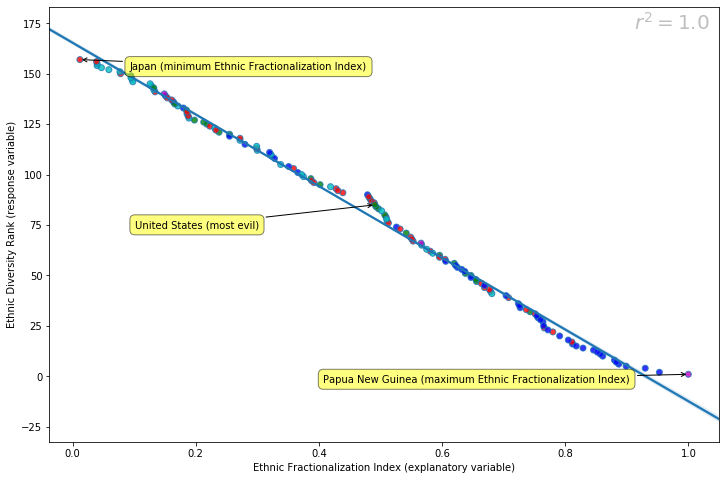

In [242]:

rv_min_xytext = (40, -10)
rv_max_xytext = (-390, 0)
ev_min_xytext = (50, -12)
ev_max_xytext = (-365, -10)
us_xytext = (-240, -25)
columns_list = [column_pairs_list[0][0].split('/')[0], column_pairs_list[0][0].split('/')[1]]
show_linear_scatterplot(columns_list)

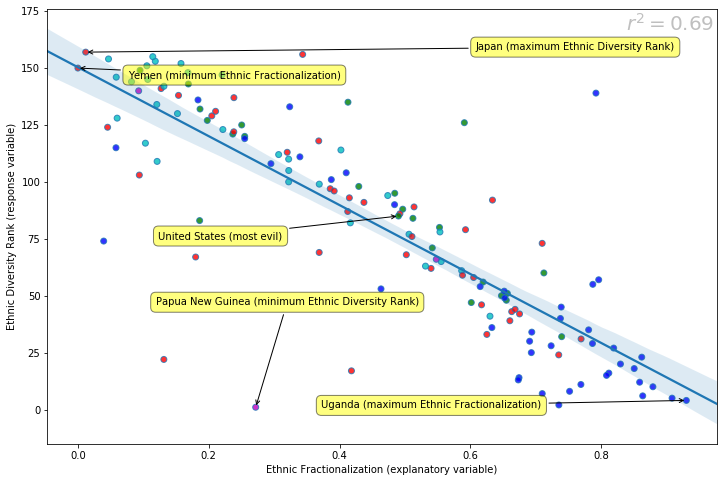

In [247]:

rv_min_xytext = (-100, 100)
rv_max_xytext = (390, 0)
ev_min_xytext = (50, -12)
ev_max_xytext = (-365, -10)
us_xytext = (-240, -25)
columns_list = [column_pairs_list[1][0].split('/')[0], column_pairs_list[1][0].split('/')[1]]
show_linear_scatterplot(columns_list)

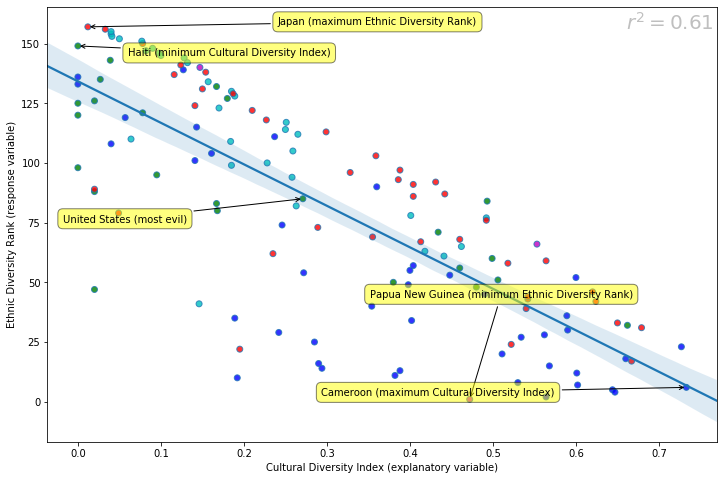

In [251]:

rv_min_xytext = (-100, 100)
rv_max_xytext = (190, 0)
ev_min_xytext = (50, -12)
ev_max_xytext = (-365, -10)
us_xytext = (-240, -25)
columns_list = [column_pairs_list[2][0].split('/')[0], column_pairs_list[2][0].split('/')[1]]
show_linear_scatterplot(columns_list)

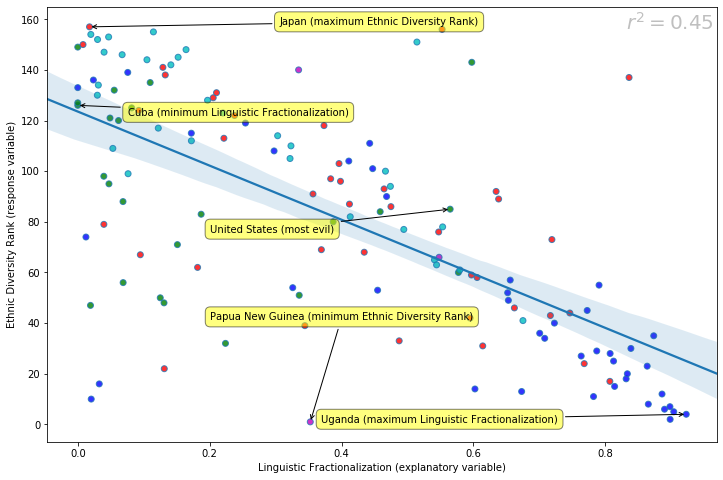

In [250]:

rv_min_xytext = (-100, 100)
rv_max_xytext = (190, 0)
ev_min_xytext = (50, -12)
ev_max_xytext = (-365, -10)
us_xytext = (-240, -25)
columns_list = [column_pairs_list[3][0].split('/')[0], column_pairs_list[3][0].split('/')[1]]
show_linear_scatterplot(columns_list)

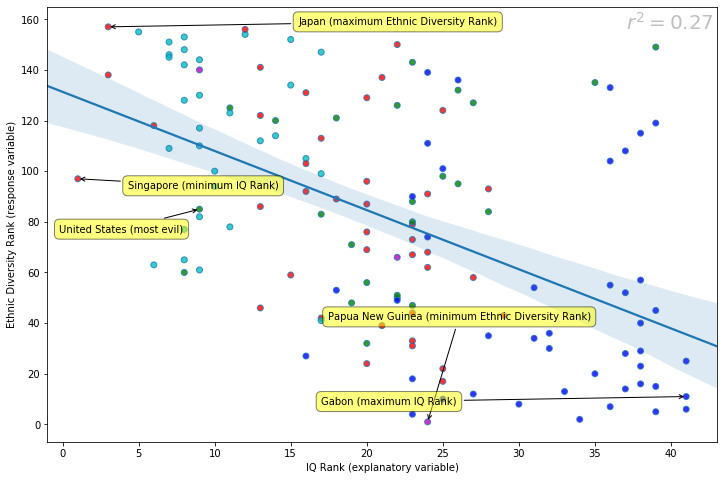

In [253]:

rv_min_xytext = (-100, 100)
rv_max_xytext = (190, 0)
ev_min_xytext = (50, -12)
ev_max_xytext = (-365, -10)
us_xytext = (-140, -25)
columns_list = [column_pairs_list[4][0].split('/')[0], column_pairs_list[4][0].split('/')[1]]
show_linear_scatterplot(columns_list)

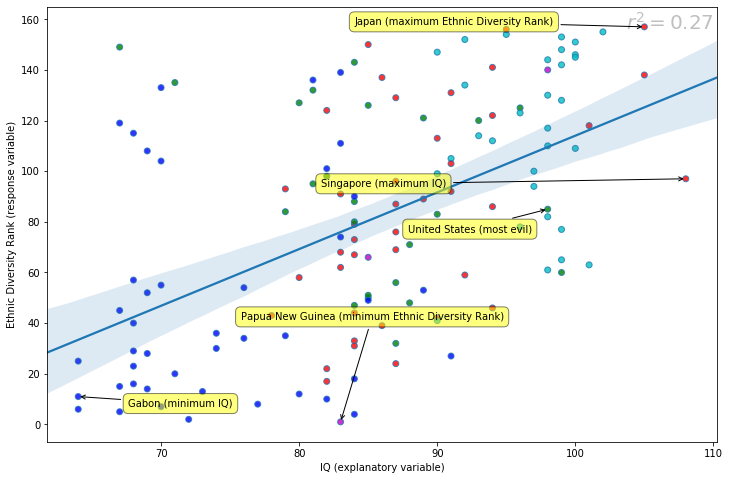

In [256]:

rv_min_xytext = (-100, 100)
rv_max_xytext = (-290, 0)
ev_min_xytext = (50, -12)
ev_max_xytext = (-365, -10)
us_xytext = (-140, -25)
columns_list = [column_pairs_list[5][0].split('/')[0], column_pairs_list[5][0].split('/')[1]]
show_linear_scatterplot(columns_list)

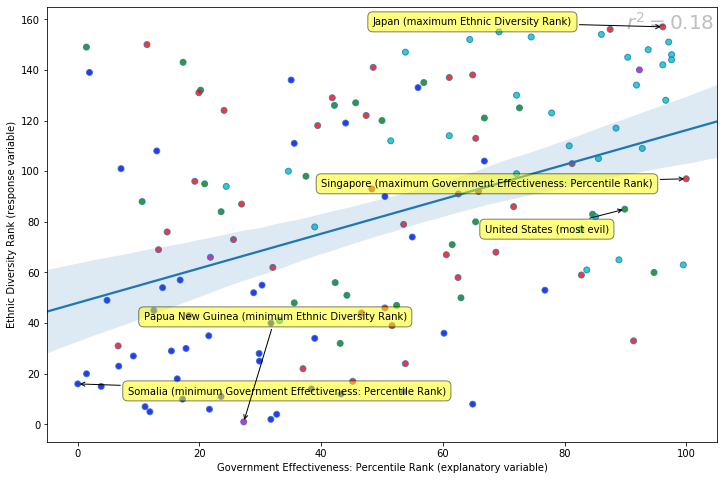

In [257]:

rv_min_xytext = (-100, 100)
rv_max_xytext = (-290, 0)
ev_min_xytext = (50, -12)
ev_max_xytext = (-365, -10)
us_xytext = (-140, -25)
columns_list = [column_pairs_list[6][0].split('/')[0], column_pairs_list[6][0].split('/')[1]]
show_linear_scatterplot(columns_list)

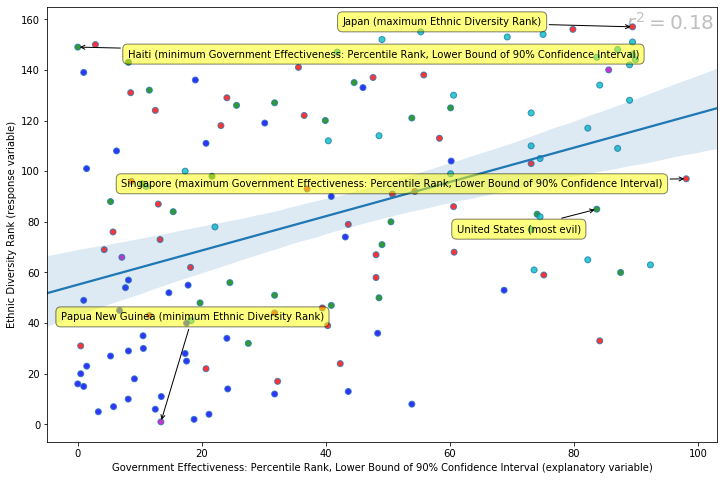

In [259]:

rv_min_xytext = (-100, 100)
rv_max_xytext = (-290, 0)
ev_min_xytext = (50, -12)
ev_max_xytext = (-565, -10)
us_xytext = (-140, -25)
columns_list = [column_pairs_list[7][0].split('/')[0], column_pairs_list[7][0].split('/')[1]]
show_linear_scatterplot(columns_list)

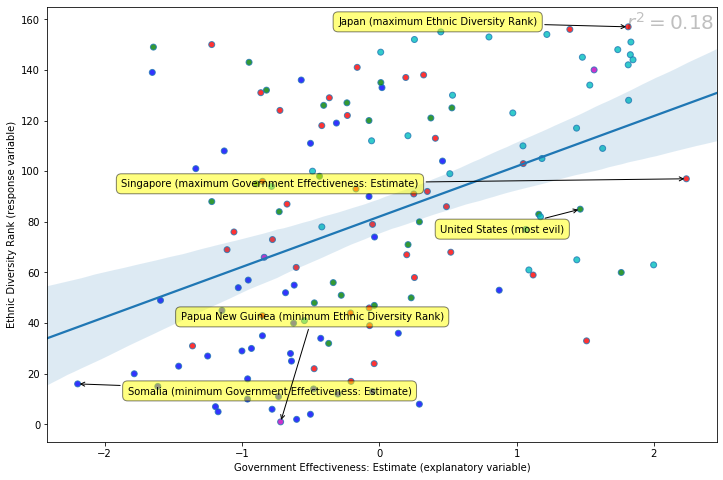

In [260]:

rv_min_xytext = (-100, 100)
rv_max_xytext = (-290, 0)
ev_min_xytext = (50, -12)
ev_max_xytext = (-565, -10)
us_xytext = (-140, -25)
columns_list = [column_pairs_list[8][0].split('/')[0], column_pairs_list[8][0].split('/')[1]]
show_linear_scatterplot(columns_list)

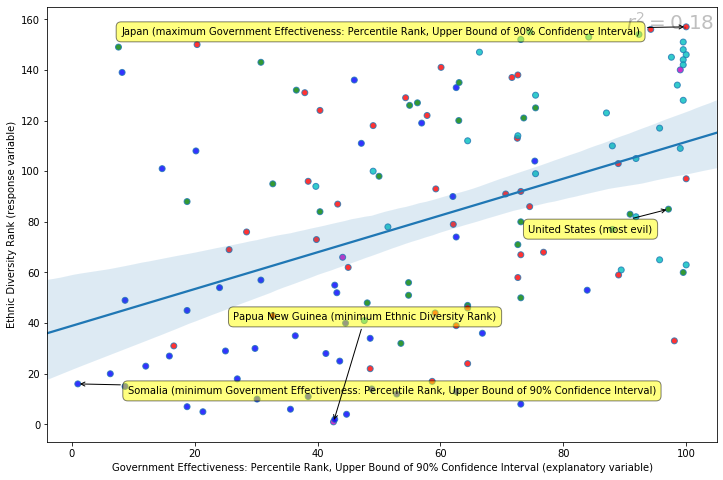

In [261]:

rv_min_xytext = (-100, 100)
rv_max_xytext = (-290, 0)
ev_min_xytext = (50, -12)
ev_max_xytext = (-565, -10)
us_xytext = (-140, -25)
columns_list = [column_pairs_list[9][0].split('/')[0], column_pairs_list[9][0].split('/')[1]]
show_linear_scatterplot(columns_list)

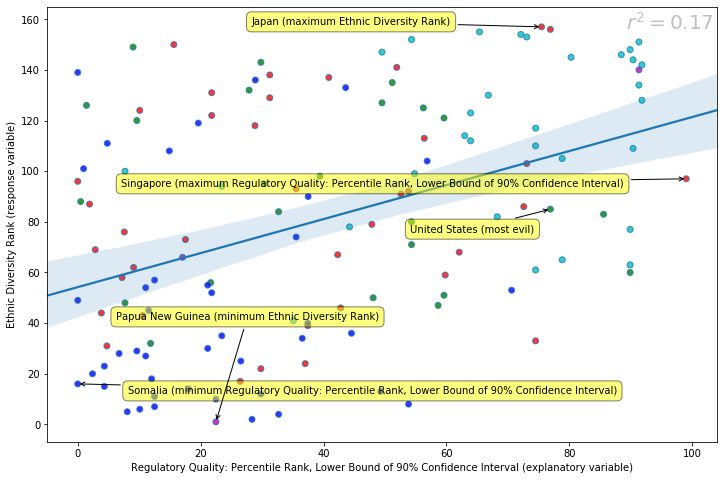

In [262]:

rv_min_xytext = (-100, 100)
rv_max_xytext = (-290, 0)
ev_min_xytext = (50, -12)
ev_max_xytext = (-565, -10)
us_xytext = (-140, -25)
columns_list = [column_pairs_list[10][0].split('/')[0], column_pairs_list[10][0].split('/')[1]]
show_linear_scatterplot(columns_list)

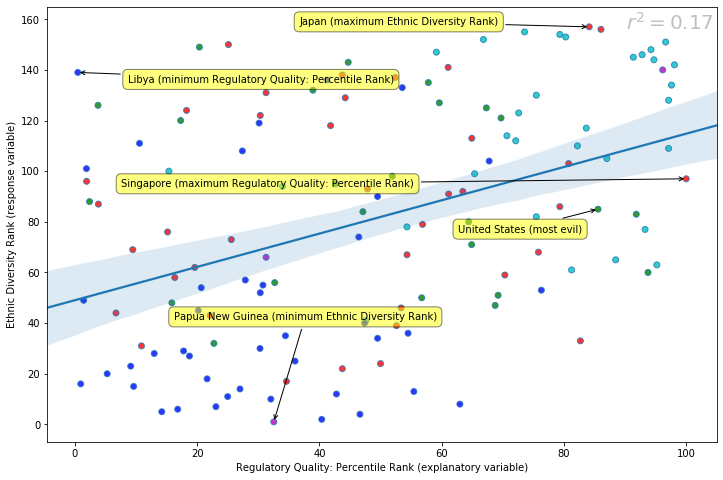

In [263]:

rv_min_xytext = (-100, 100)
rv_max_xytext = (-290, 0)
ev_min_xytext = (50, -12)
ev_max_xytext = (-565, -10)
us_xytext = (-140, -25)
columns_list = [column_pairs_list[11][0].split('/')[0], column_pairs_list[11][0].split('/')[1]]
show_linear_scatterplot(columns_list)

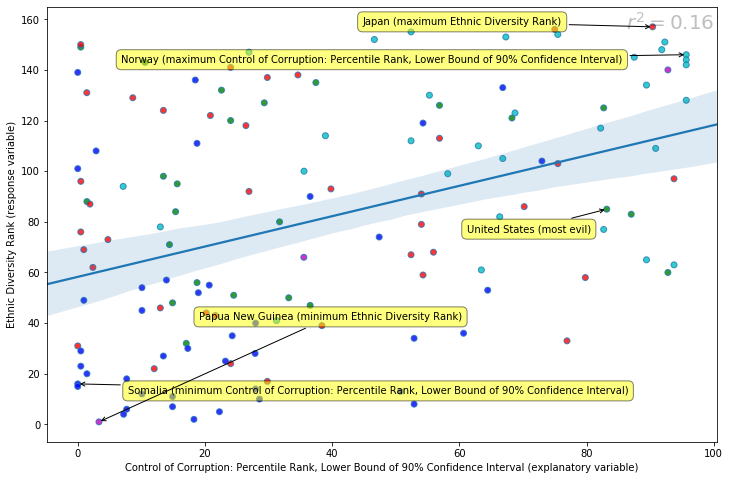

In [265]:

rv_min_xytext = (100, 100)
rv_max_xytext = (-290, 0)
ev_min_xytext = (50, -12)
ev_max_xytext = (-565, -10)
us_xytext = (-140, -25)
columns_list = [column_pairs_list[12][0].split('/')[0], column_pairs_list[12][0].split('/')[1]]
show_linear_scatterplot(columns_list)

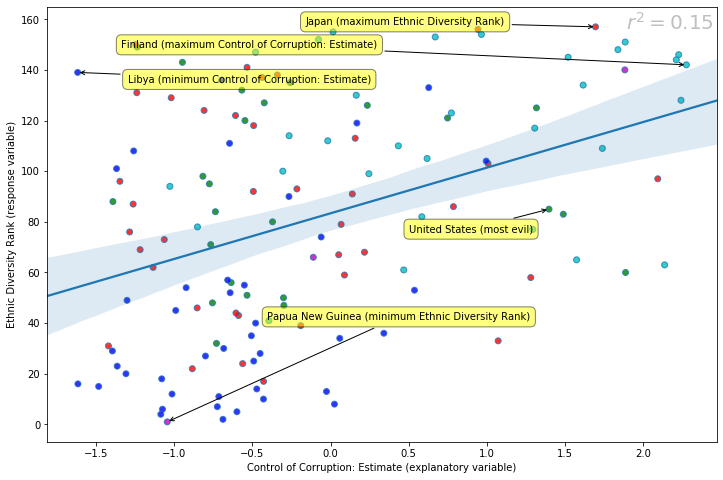

In [268]:

rv_min_xytext = (100, 100)
rv_max_xytext = (-290, 0)
ev_min_xytext = (50, -12)
ev_max_xytext = (-565, 15)
us_xytext = (-140, -25)
columns_list = [column_pairs_list[13][0].split('/')[0], column_pairs_list[13][0].split('/')[1]]
show_linear_scatterplot(columns_list)

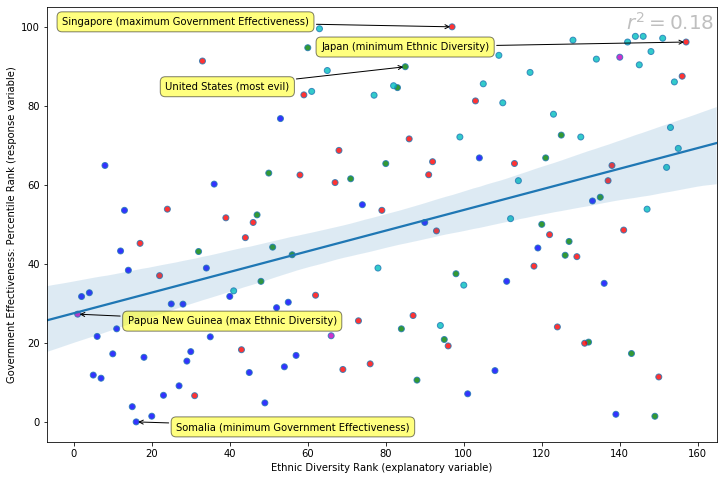

In [234]:

rv_min_xytext = (40, -10)
rv_max_xytext = (-390, 0)
ev_min_xytext = (50, -12)
ev_max_xytext = (-365, -10)
us_xytext = (-240, -25)
columns_list = ['Ethnic_diversity_rank', 'GE_PER_RNK']
show_linear_scatterplot(columns_list, ev_min_str='max Ethnic Diversity', ev_max_str='minimum Ethnic Diversity',
                        rv_min_str='minimum Government Effectiveness', rv_max_str='maximum Government Effectiveness')